In [23]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn import preprocessing
from sklearn import utils

In [25]:
filename='E:/ASSIGNMENT FROM EXCELR/KNN/wbcd.csv'

In [26]:
dataframe = read_csv(filename)
dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [28]:
dataframe.diagnosis.unique()

array(['B', 'M'], dtype=object)

In [29]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataframe['diagnosis']=label_encoder.fit_transform(dataframe['diagnosis'])

In [30]:
array = dataframe.values
array

array([[8.7139402e+07, 0.0000000e+00, 1.2320000e+01, ..., 9.3910000e-02,
        2.8270000e-01, 6.7710000e-02],
       [8.9102510e+06, 0.0000000e+00, 1.0600000e+01, ..., 7.9260000e-02,
        2.9400000e-01, 7.5870000e-02],
       [9.0552000e+05, 0.0000000e+00, 1.1040000e+01, ..., 7.4310000e-02,
        2.9980000e-01, 7.8810000e-02],
       ...,
       [8.7388500e+05, 1.0000000e+00, 1.5280000e+01, ..., 1.2260000e-01,
        3.1750000e-01, 9.7720000e-02],
       [9.1120100e+05, 0.0000000e+00, 1.4530000e+01, ..., 1.0690000e-01,
        2.6060000e-01, 7.8100000e-02],
       [9.0127950e+06, 1.0000000e+00, 2.1370000e+01, ..., 1.9660000e-01,
        2.7300000e-01, 8.6660000e-02]])

In [31]:
X = array[:, 2:32]
Y = array[:, 1]

In [32]:
X

array([[1.232e+01, 1.239e+01, 7.885e+01, ..., 9.391e-02, 2.827e-01,
        6.771e-02],
       [1.060e+01, 1.895e+01, 6.928e+01, ..., 7.926e-02, 2.940e-01,
        7.587e-02],
       [1.104e+01, 1.683e+01, 7.092e+01, ..., 7.431e-02, 2.998e-01,
        7.881e-02],
       ...,
       [1.528e+01, 2.241e+01, 9.892e+01, ..., 1.226e-01, 3.175e-01,
        9.772e-02],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [2.137e+01, 1.510e+01, 1.413e+02, ..., 1.966e-01, 2.730e-01,
        8.666e-02]])

In [33]:
Y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0.

In [34]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y))
print(utils.multiclass.type_of_target(Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 1 1 1 

In [35]:
kfold = KFold(n_splits=15)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
#knn.fit(X, training_scores_encoded)
#prediction=knn(dataframe)
results = cross_val_score(knn, X, Y, cv=kfold)

In [39]:
print(results.mean())

0.9332385016595541


In [40]:
print(results)

[0.94736842 0.86842105 0.94736842 0.86842105 0.94736842 0.89473684
 0.94736842 1.         0.94736842 0.97368421 0.84210526 0.97368421
 0.94736842 0.94736842 0.94594595]


In [41]:
print(results.mean())

0.9332385016595541


# Grid Search for Algorithm Tuning

In [44]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
filename = 'E:/ASSIGNMENT FROM EXCELR/KNN/wbcd.csv'
dataframe = read_csv(filename)
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataframe['diagnosis']=label_encoder.fit_transform(dataframe['diagnosis'])
array = dataframe.values
X=array[:,2:23]
Y=array[:,1]

In [46]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [47]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y))
print(utils.multiclass.type_of_target(Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 1 1 1 

In [48]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [49]:
# gives best accuracy
print(grid.best_score_)
print(grid.best_params_)

0.8963825492935878
{'n_neighbors': 9}


# Visualizing the CV results

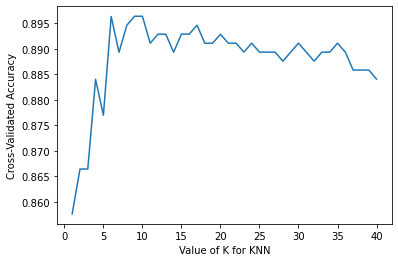

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()